In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/project/result_sensor_221110.csv')
df.head()

,time,co2,hcho,humidity,pm100,pm25,temp,temperature,vibr
0,2022-08-30T01:58:05.752Z,657,28,55,7,3,NaN,23,NaN
1,2022-08-30T01:58:15.746Z,657,28,55,9,4,NaN,23,NaN
2,2022-08-30T01:58:25.755Z,657,28,55,7,3,NaN,23,NaN
3,2022-08-30T01:58:35.754Z,657,28,54,7,3,NaN,23,NaN
4,2022-08-30T01:58:45.757Z,658,26,53,5,1,NaN,23,NaN


In [ ]:
df.shape

(103289, 9)

In [ ]:
# null값 0~82행까지
df.isnull().sum()

time            0
co2             0
hcho            0
humidity        0
pm100           0
pm25            0
temp           82
temperature     0
vibr           82
dtype: int64

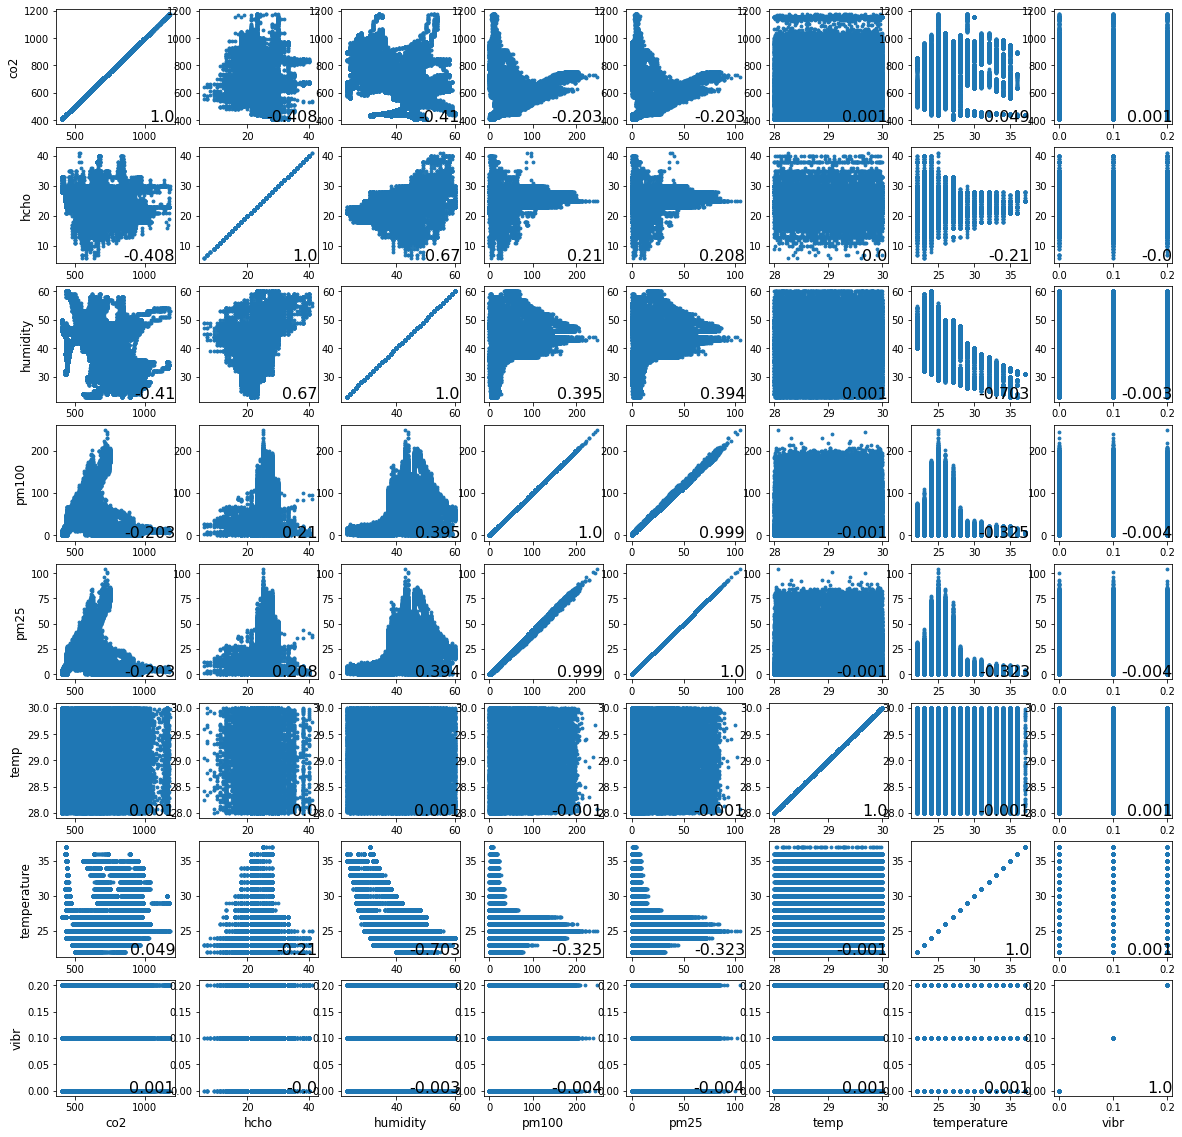

In [ ]:
# 상관관계
feature = ['co2', 'hcho', 'humidity', 'pm100', 'pm25', 'temp', 'temperature', 'vibr']
corr_feature = df[feature].corr()

fig = plt.figure(figsize=(20,20))

n_feature = len(feature)
for i in range(n_feature):
    for j in range(n_feature):
        ax = fig.add_subplot(n_feature, n_feature, i*n_feature + j + 1)
        plt.scatter(feature[j], feature[i], data=df, s = 8)

        if i == n_feature-1:
            plt.xlabel(feature[j], fontsize=12)
        if j == 0:
            plt.ylabel(feature[i], fontsize=12)
        ax.annotate(np.round(corr_feature.loc[feature[i], feature[j]], 3), xy=(1,0),
                    xycoords='axes fraction', fontsize=16,
                    horizontalalignment='right', verticalalignment='bottom')
plt.show()

In [3]:
df1 = df.dropna(axis=0, how='any')
df1

,time,co2,hcho,humidity,pm100,pm25,temp,temperature,vibr
82,2022-08-30T02:11:50.059Z,658,28,49,3,1,29.02,23,0.1
83,2022-08-30T02:11:59.047Z,658,28,49,3,1,29.50,23,0.0
84,2022-08-30T02:12:09.05Z,657,28,49,1,0,28.66,23,0.1
85,2022-08-30T02:12:19.049Z,657,28,49,3,1,28.42,23,0.0
86,2022-08-30T02:12:32.534Z,657,28,49,1,0,29.79,23,0.0
...,...,...,...,...,...,...,...,...,...
103284,2022-09-16T15:59:15.068Z,575,21,40,25,11,29.22,28,0.0
103285,2022-09-16T15:59:25.073Z,575,21,40,25,11,28.42,28,0.0
103286,2022-09-16T15:59:35.073Z,575,21,40,25,11,28.10,28,0.1
103287,2022-09-16T15:59:45.082Z,575,21,40,25,11,28.06,28,0.1


In [ ]:
df1.isnull().sum()

time           0
co2            0
hcho           0
humidity       0
pm100          0
pm25           0
temp           0
temperature    0
vibr           0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103207 entries, 82 to 103288
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time         103207 non-null  object 
 1   co2          103207 non-null  int64  
 2   hcho         103207 non-null  int64  
 3   humidity     103207 non-null  int64  
 4   pm100        103207 non-null  int64  
 5   pm25         103207 non-null  int64  
 6   temp         103207 non-null  float64
 7   temperature  103207 non-null  int64  
 8   vibr         103207 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 11.9+ MB


In [ ]:
df1.describe()

,co2,hcho,humidity,pm100,pm25,temp,temperature,vibr
count,103207.000000,103207.000000,103207.000000,103207.000000,103207.000000,103207.000000,103207.000000,103207.000000
mean,666.911634,24.208765,40.408519,34.029174,14.274865,28.998665,26.869146,0.100427
std,179.580605,3.521236,8.619789,38.831127,16.505926,0.576848,3.386483,0.070687
min,409.000000,6.000000,23.000000,0.000000,0.000000,28.000000,22.000000,0.000000
25%,550.000000,21.000000,34.000000,9.000000,3.000000,28.500000,24.000000,0.100000
50%,637.000000,23.000000,41.000000,18.000000,7.000000,29.000000,26.000000,0.100000
75%,783.000000,28.000000,47.000000,50.000000,20.000000,29.500000,28.000000,0.200000
max,1177.000000,41.000000,60.000000,248.000000,104.000000,30.000000,37.000000,0.200000


## 군집분석

In [ ]:
df1.columns

Index(['time', 'co2', 'hcho', 'humidity', 'pm100', 'pm25', 'temp',
       'temperature', 'vibr'],
      dtype='object')

In [5]:
X = df1.copy()

In [7]:
# 정상데이터 비화재 0, 화재 1로 정함(현재데이터는 정상이므로 비화재처리)
X['target'] = 0
# 시계열데이터 정리
del X['time']

In [ ]:
display(X)

,co2,hcho,humidity,pm100,pm25,temp,temperature,vibr,target
84,657,28,49,1,0,28.66,23,0.1,0
85,657,28,49,3,1,28.42,23,0.0,0
86,657,28,49,1,0,29.79,23,0.0,0
87,657,28,49,1,0,28.65,23,0.0,0
88,656,30,49,5,1,28.98,23,0.0,0
...,...,...,...,...,...,...,...,...,...
103284,575,21,40,25,11,29.22,28,0.0,0
103285,575,21,40,25,11,28.42,28,0.0,0
103286,575,21,40,25,11,28.10,28,0.1,0
103287,575,21,40,25,11,28.06,28,0.1,0


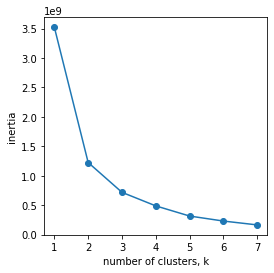

,co2,hcho,humidity,pm100,pm25,temp,temperature,vibr,target,pred
82,658,28,49,3,1,29.02,23,0.1,0,5
83,658,28,49,3,1,29.50,23,0.0,0,5
84,657,28,49,1,0,28.66,23,0.1,0,5
85,657,28,49,3,1,28.42,23,0.0,0,5
86,657,28,49,1,0,29.79,23,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...
103284,575,21,40,25,11,29.22,28,0.0,0,2
103285,575,21,40,25,11,28.42,28,0.0,0,2
103286,575,21,40,25,11,28.10,28,0.1,0,2
103287,575,21,40,25,11,28.06,28,0.1,0,2


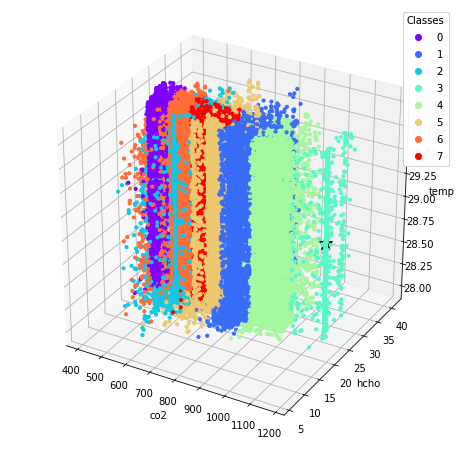

In [12]:
from sklearn.cluster import KMeans

# [inertia를 통해서 최적 분류 개수 찾기]

inertias = []
num=8
for k in range(1,num):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(4, 4))
plt.plot([i for i in range(1,num)], inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks([i for i in range(1,num)])
plt.show()

# [모델생성 및 학습]
clust_model = KMeans(n_clusters = 8 # 클러스터 갯수
                     , n_init=100 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
                     , max_iter=1000 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
                     , random_state = 42
                     , algorithm='auto'
                    )
clust_model.fit(X) 

# [예측값과 군집중심값]
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(X) # 각 예측군집

# [3d scatterplot 그리기]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
X["pred"] = pred
display(X)

ax.scatter(centers[:,0],centers[:,1],centers[:,5] ,c='black', s=200, marker='*')
scatter = ax.scatter(X.iloc[:,0],
                     X.iloc[:,1],
                     X.iloc[:,5],
                     s=10, #사이즈
                     c=X.pred,
                     cmap="rainbow",
                     alpha=1, #투명도
                     )

# 축표시
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[5])

# 범례표시
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

# 군집분석(2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/project/result_sensor_221110.csv')
df.head()

,time,co2,hcho,humidity,pm100,pm25,temp,temperature,vibr
0,2022-08-30T01:58:05.752Z,657,28,55,7,3,NaN,23,NaN
1,2022-08-30T01:58:15.746Z,657,28,55,9,4,NaN,23,NaN
2,2022-08-30T01:58:25.755Z,657,28,55,7,3,NaN,23,NaN
3,2022-08-30T01:58:35.754Z,657,28,54,7,3,NaN,23,NaN
4,2022-08-30T01:58:45.757Z,658,26,53,5,1,NaN,23,NaN


In [ ]:
df = df.dropna(axis=0, how='any')

In [ ]:
X = df.copy()

In [ ]:
X = X.to_numpy()
X

array([['2022-08-30T02:11:50.059Z', 658, 28, ..., 29.02, 23, 0.1],
       ['2022-08-30T02:11:59.047Z', 658, 28, ..., 29.5, 23, 0.0],
       ['2022-08-30T02:12:09.05Z', 657, 28, ..., 28.66, 23, 0.1],
       ...,
       ['2022-09-16T15:59:35.073Z', 575, 21, ..., 28.1, 28, 0.1],
       ['2022-09-16T15:59:45.082Z', 575, 21, ..., 28.06, 28, 0.1],
       ['2022-09-16T15:59:55.082Z', 575, 21, ..., 28.48, 28, 0.1]],
      dtype=object)

In [ ]:
X[2]

array(['2022-08-30T02:12:09.05Z', 657, 28, 49, 1, 0, 28.66, 23, 0.1],
      dtype=object)

In [ ]:
from sklearn.ensemble import IsolationForest

columns_ = ['time', 'co2', 'hcho', 'pm100', 'pm25', 'temp', 'temperature', 'vibr']

rng = np.random.RandomState(42)
# Generating training data 
X_train = 0.2 * rng.randn(10000, 8)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = columns_)

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(2000, 8)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = columns_)

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 8))
X_outliers = pd.DataFrame(X_outliers, columns = columns_)

In [ ]:
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


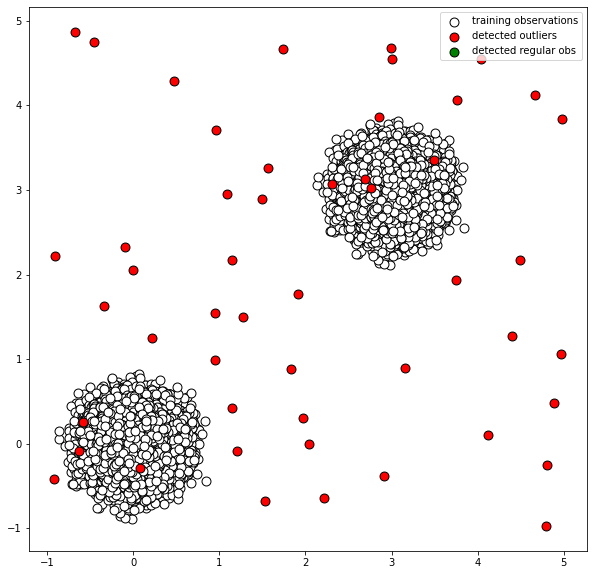

In [ ]:
X_outliers = X_outliers.assign(y = y_pred_outliers)
p1 = plt.scatter(X_train.temperature, X_train.hcho, c='white',
                 s=20*4, edgecolor='k', label="training observations")
p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['temperature']], 
                 X_outliers.loc[X_outliers.y == -1, ['hcho']], 
                 c='red', s=20*4, edgecolor='k', label="detected outliers")
p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['temperature']], 
                 X_outliers.loc[X_outliers.y == 1, ['hcho']], 
                 c='green', s=20*4, edgecolor='k', label="detected regular obs")
plt.legend()

In [ ]:
print("테스트 데이터셋에서 정확도:", list(y_pred_test).count(1)/y_pred_test.shape[0])
print("이상치 데이터셋에서 정확도:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

테스트 데이터셋에서 정확도: 0.89765
이상치 데이터셋에서 정확도: 1.0


# 군집분석(3)
- feature 8개로 군집

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/project/result_sensor_221110.csv')

df = df.dropna(axis=0, how='any')
X = df.copy()
del X['time']

X = X.to_numpy()
X

array([[6.580e+02, 2.800e+01, 4.900e+01, ..., 2.902e+01, 2.300e+01,
        1.000e-01],
       [6.580e+02, 2.800e+01, 4.900e+01, ..., 2.950e+01, 2.300e+01,
        0.000e+00],
       [6.570e+02, 2.800e+01, 4.900e+01, ..., 2.866e+01, 2.300e+01,
        1.000e-01],
       ...,
       [5.750e+02, 2.100e+01, 4.000e+01, ..., 2.810e+01, 2.800e+01,
        1.000e-01],
       [5.750e+02, 2.100e+01, 4.000e+01, ..., 2.806e+01, 2.800e+01,
        1.000e-01],
       [5.750e+02, 2.100e+01, 4.000e+01, ..., 2.848e+01, 2.800e+01,
        1.000e-01]])

In [30]:
X.shape

(103207, 8)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((82565, 8), (20642, 8))

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [49]:
X_train[0]

array([0.31640625, 0.54285714, 0.56756757, 0.50806452, 0.51923077,
       0.28      , 0.2       , 0.5       ])

In [53]:
X_test[0]

array([0.66840731, 0.48484848, 0.02702703, 0.0456621 , 0.04347826,
       0.95      , 0.86666667, 0.5       ])

In [78]:
from sklearn.cluster import KMeans
k = 8
kmeans = KMeans(n_clusters = k, random_state=10)
kmeans.fit(X_train)

KMeans(random_state=10)

In [66]:
kmeans.labels_

array([0, 6, 3, ..., 5, 1, 0], dtype=int32)

In [79]:
len(kmeans.labels_)

82565

In [67]:
kmeans.predict(X_train)

array([0, 6, 3, ..., 5, 1, 0], dtype=int32)

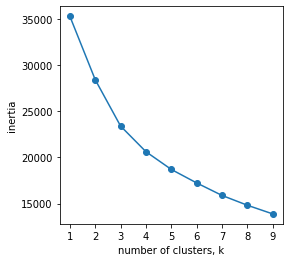

In [72]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## OUTLIER

In [ ]:
def get_outlier(df = None, column = None, weight=1.5):
    '''
    인자로 Dataframe과 이상치를 검출할 칼럼을 입력받는다. 
    iqr에 1.5 곱해서 이에 기반하여 이상치를 구해 해당 이상치가 있는 index 반환
    '''

    column_x = df[column]
    # 1/4분위와 3/4분위 지점을 np.percentile로 구함
    Q1 = np.percentile(column_x.values, 25)
    Q3 = np.percentile(column_x.values, 75)

    # IQR을 구하고 IQR에 1.5을 곱해 최댓값 최솟값 지점 구함.
    iqr = Q3 - Q1
    iqr_weight = iqr * weight
    lowest_val = Q1 - iqr_weight
    highest_val = Q3 + iqr_weight

    # 최대값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 Dataframe index로 반환
    outlier_index = column_x[(column_x < lowest_val) | (column_x > highest_val)].index
    return outlier_index

In [ ]:
a = get_outlier(df1, 'co2')

In [ ]:
len(a)

3488

In [ ]:
a

Int64Index([50147, 50148, 50149, 50150, 50151, 50152, 50153, 50154, 50155,
            50156,
            ...
            98119, 98120, 98121, 98122, 98123, 98124, 98125, 98126, 98127,
            98128],
           dtype='int64', length=3488)